In [3]:
import sklearn as sk
import cv2
import os
import celltool
import pandas as pd

In [29]:
# the folder names are all different now but we create a mask for every image and add a border of black pixels
import os
import cv2
import numpy as np

directory = '/Users/raghavgarg/Desktop/CS279Project/cell_images'
sub_dir = ['Parasitized', 'Uninfected']

for sub in sub_dir:
    input_path = os.path.join(directory, sub)
    output_path = os.path.join(directory, sub + 'Mask_border')

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    all_files = sorted(os.listdir(input_path))
    image_files = [file for file in all_files if file.endswith('.png')]

    for image_file in image_files:
        image_path = os.path.join(input_path, image_file)
        img = cv2.imread(image_path)

        # Convert image to binary mask
        mask = np.all(img == [0, 0, 0], axis=-1)  # Finding black pixels
        mask = mask == False
        mask = mask.astype(np.uint8) * 255  # Converting boolean to uint8

        # Add 4 pixels to height and width dimensions
        height, width = mask.shape
        expanded_mask = np.zeros((height + 4, width + 4), dtype=np.uint8)

        expanded_mask[2:-2, 2:-2] = mask

        # Save the expanded mask image
        mask_output_path = os.path.join(output_path, image_file)
        cv2.imwrite(mask_output_path, expanded_mask)


In [44]:
# We remove images and masks that have pixels that are not connected
dirs = ['Uninfected', 'Parasitized']
for dir in dirs:
    contours_dir = f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}Contours'
    mask_dir = f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}Mask'

    contours_files = [os.path.splitext(file)[0] for file in os.listdir(contours_dir)]
    mask_files = [os.path.splitext(file)[0] for file in os.listdir(mask_dir)]

    different_files = set(contours_files) ^ set(mask_files)
    common_files = set(contours_files) & set(mask_files)
    print(len(different_files))

    # we will remove cells that are discontinuous
    remove_directories = [f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}Mask',
               f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}Contours',
               f'/Users/raghavgarg/Desktop/CS279Project/cell_images/{dir}']
    for directory in directories:
        files = os.listdir(directory)
        for file in files:
            if file.endswith('.png') or file.endswith('.contour'):
                file_path = os.path.join(directory, file)
                if os.path.splitext(file)[0] not in common_files:
                    os.remove(file_path)

67

In [51]:
import os
import random
import shutil

# Define the directories
base_dir = '/Users/raghavgarg/Desktop/CS279Project/cell_images'
source_dirs = ['Parasitized', 'Uninfected']
target_dirs = ['ParasitizedTest', 'UninfectedTest']
mask_dirs = ['ParasitizedMask', 'UninfectedMask']
target_mask_dirs = ['ParasitizedMaskTest', 'UninfectedMaskTest']

# Create the target directories if they don't exist
for target_dir in target_dirs:
    target_path = os.path.join(base_dir, target_dir)
    if not os.path.exists(target_path):
        os.makedirs(target_path)

for target_mask_dir in target_mask_dirs:
    target_mask_path = os.path.join(base_dir, target_mask_dir)
    if not os.path.exists(target_mask_path):
        os.makedirs(target_mask_path)

# Iterate over the source directories
for source_dir, target_dir, mask_dir, target_mask_dir in zip(source_dirs, target_dirs, mask_dirs, target_mask_dirs):
    source_path = os.path.join(base_dir, source_dir)
    target_path = os.path.join(base_dir, target_dir)
    mask_path = os.path.join(base_dir, mask_dir)
    target_mask_path = os.path.join(base_dir, target_mask_dir)

    # Get the list of PNG files in the source directory
    file_list = [file for file in os.listdir(source_path) if file.endswith('.png')]

    # Calculate the number of files to move (20% of the total)
    num_files_to_move = int(len(file_list) * 0.2)

    # Randomly select the files to move
    files_to_move = random.sample(file_list, num_files_to_move)

    # Move the selected files to the target directory
    for file in files_to_move:
        source_file_path = os.path.join(source_path, file)
        target_file_path = os.path.join(target_path, file)
        shutil.move(source_file_path, target_file_path)

        # Move the corresponding mask file to the target mask directory
        mask_file_path = os.path.join(mask_path, file)
        target_mask_file_path = os.path.join(target_mask_path, file)
        shutil.move(mask_file_path, target_mask_file_path)


In [57]:
import os

# Define the directories
base_dir = '/Users/raghavgarg/Desktop/CS279Project/cell_images'
image_dirs = ['Parasitized', 'ParasitizedTest', 'Uninfected', 'UninfectedTest']
mask_dirs = ['ParasitizedMask', 'ParasitizedMaskTest', 'UninfectedMask', 'UninfectedMaskTest']

# Iterate over the image directories
for image_dir, mask_dir in zip(image_dirs, mask_dirs):
    image_path = os.path.join(base_dir, image_dir)
    mask_path = os.path.join(base_dir, mask_dir)

    # Get the list of PNG files in the directory
    image_files = [file for file in os.listdir(image_path) if file.endswith('.png')]

    # Rename the image files
    for i, file in enumerate(image_files):
        new_filename = f'{image_dir[0].lower()}{i}.png'
        old_filepath = os.path.join(image_path, file)
        new_filepath = os.path.join(image_path, new_filename)
        os.rename(old_filepath, new_filepath)
        old_mask_filepath = os.path.join(mask_path, file)
        new_mask_filepath = os.path.join(mask_path, new_filename)
        os.rename(old_mask_filepath, new_mask_filepath)

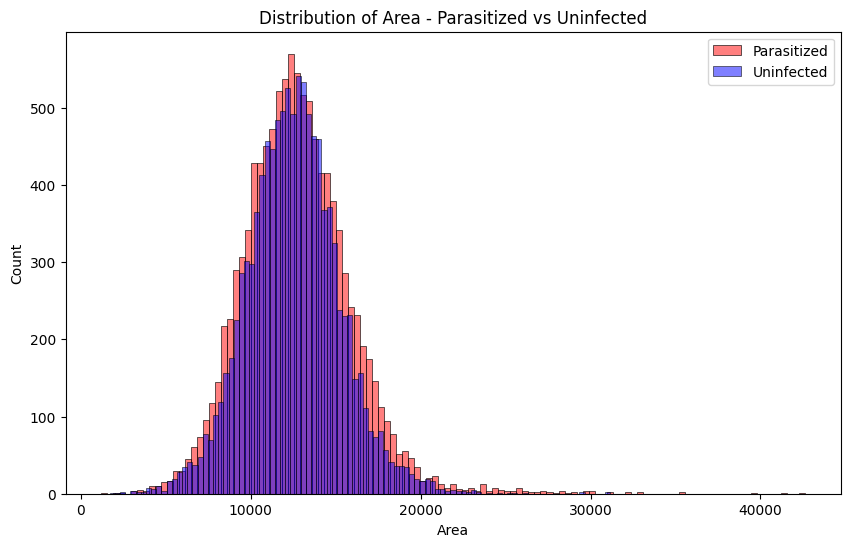

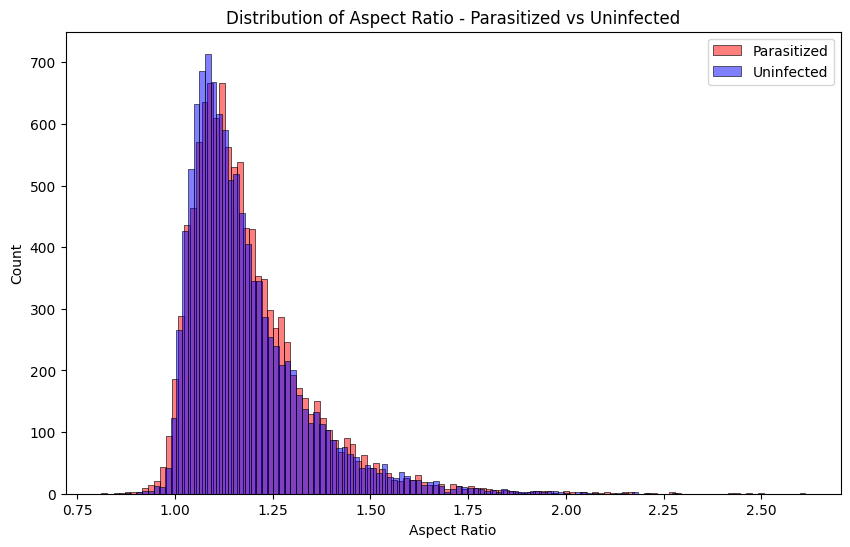

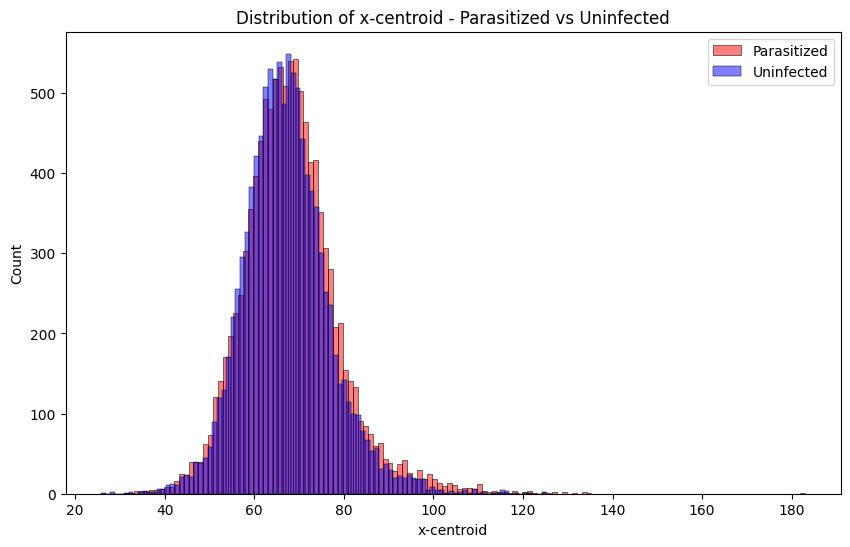

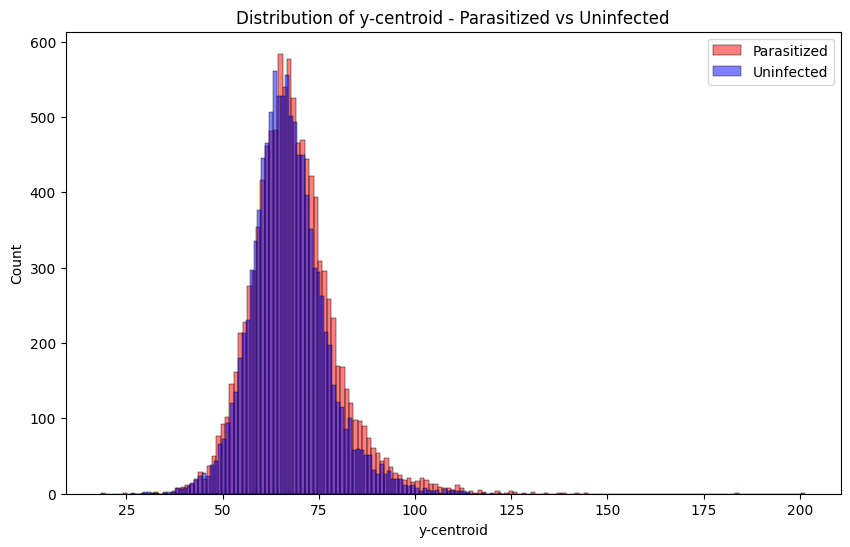

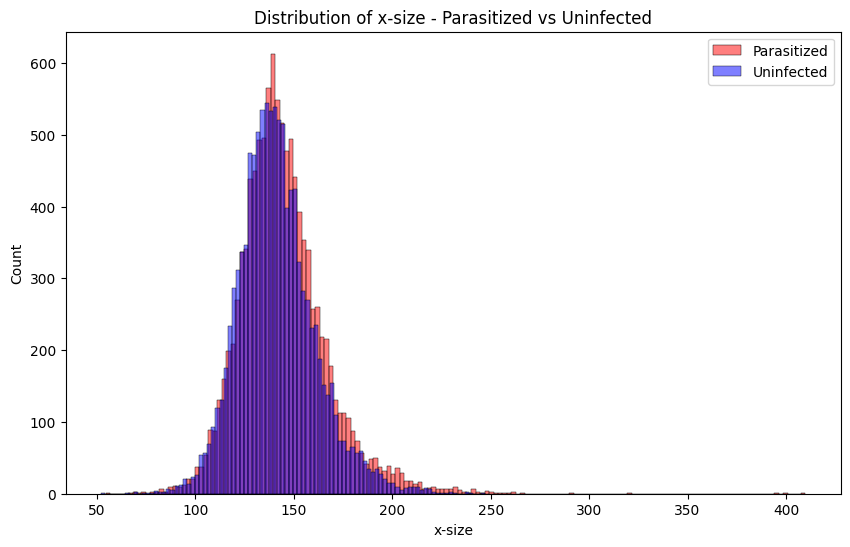

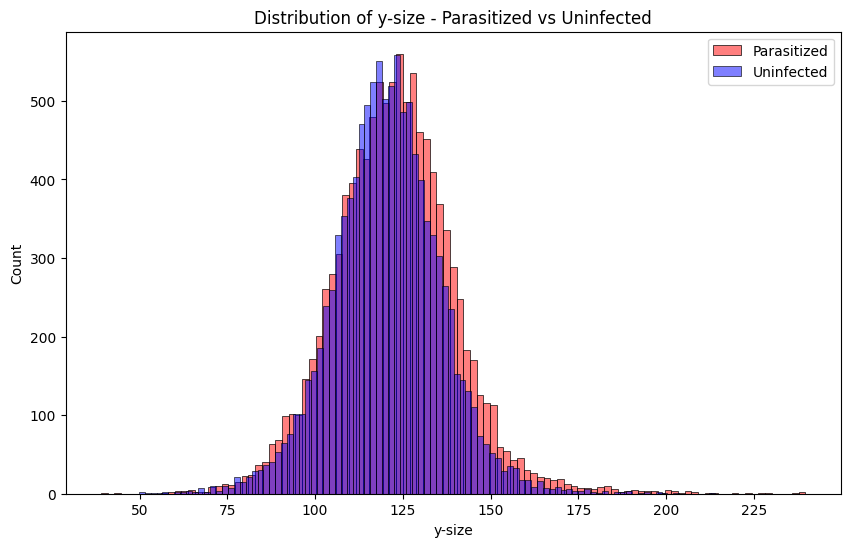

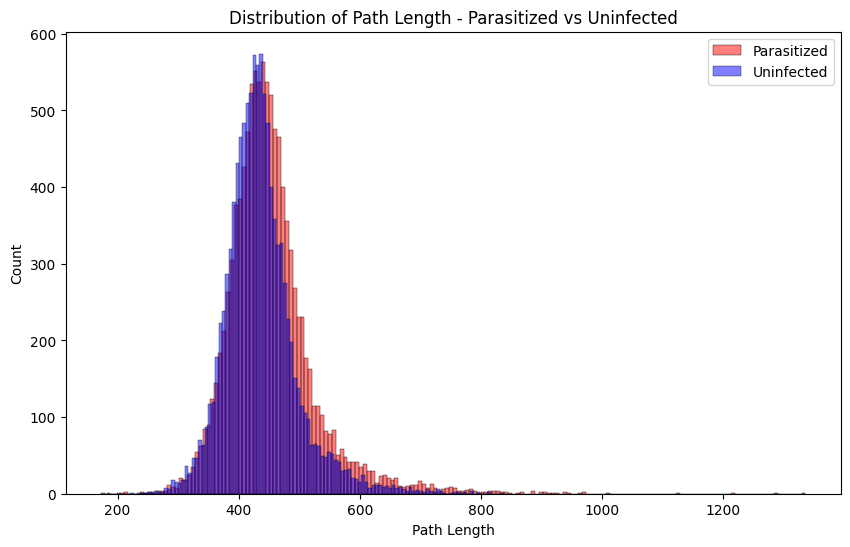

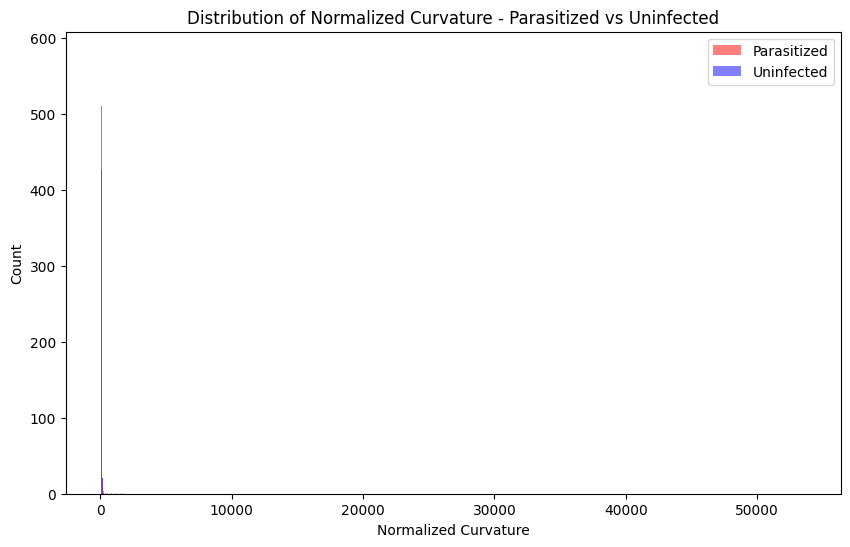

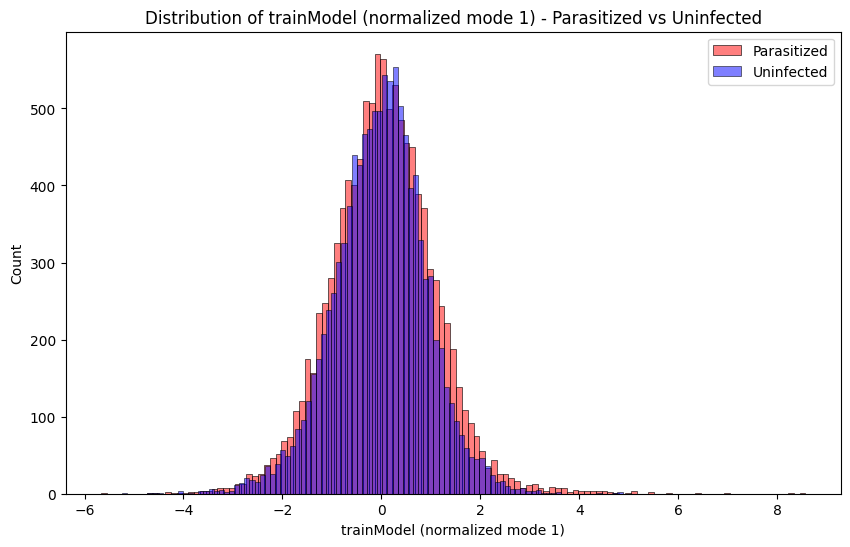

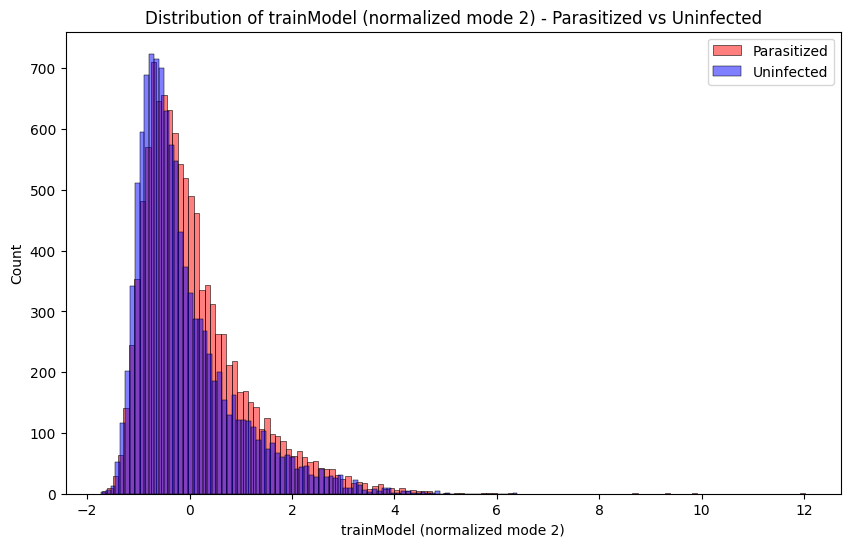

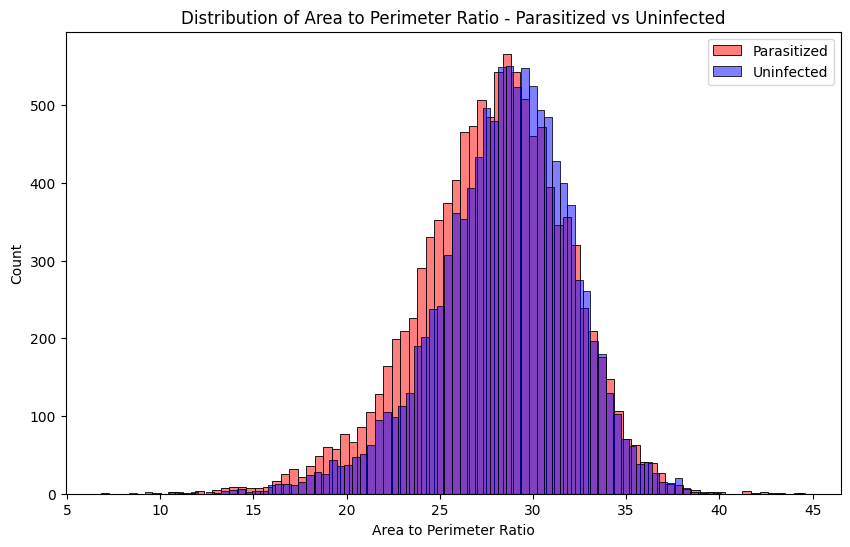

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/Users/raghavgarg/Desktop/CS279Project/cell_images')
# Read the CSV files into pandas dataframes
parasitized_df = pd.read_csv('masks/Parasitized.csv')
uninfected_df = pd.read_csv('masks/Uninfected.csv')

# cell area to cell perimeter ratio
parasitized_df['Area to Perimeter Ratio'] = parasitized_df['Area'] / parasitized_df['Path Length']
uninfected_df['Area to Perimeter Ratio'] = uninfected_df['Area'] / uninfected_df['Path Length']

# Define the list of columns to compare
columns_to_compare = ['Area', 'Aspect Ratio', 'x-centroid', 'y-centroid', 'x-size', 'y-size', 'Path Length', 'Normalized Curvature', 'trainModel (normalized mode 1)', 'trainModel (normalized mode 2)', 'Area to Perimeter Ratio']

# Loop through each column and create a distribution plot
for column in columns_to_compare:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=parasitized_df, x=column, label='Parasitized', color='red', alpha=0.5)
    sns.histplot(data=uninfected_df, x=column, label='Uninfected', color='blue', alpha=0.5)
    plt.title(f'Distribution of {column} - Parasitized vs Uninfected')
    plt.legend()
    plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
parasitized_df = pd.read_csv('masks/Parasitized.csv')
uninfected_df = pd.read_csv('masks/Uninfected.csv')
parasitized_test_df = pd.read_csv('masks/Parasitized.csv')
uninfected_test_df = pd.read_csv('masks/Uninfected.csv')

# Add the label column
parasitized_df['Label'] = 1
uninfected_df['Label'] = 0

# Split the dataset into features and target variable
X = pd.concat([parasitized_df, uninfected_df]).drop(['Label', 'Contour'], axis=1)
y = pd.concat([parasitized_df, uninfected_df])['Label']

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X, y)


Accuracy: 0.5894928360245622


In [ ]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [11]:
import os

directory = '/Users/raghavgarg/Desktop/CS279Project/cell_images/masks/ParasitizedTest'

for filename in os.listdir(directory):
    if filename.startswith('p') and filename.endswith('.png'):
        new_filename = 'q' + filename[1:]
        old_filepath = os.path.join(directory, filename)
        new_filepath = os.path.join(directory, new_filename)
        os.rename(old_filepath, new_filepath)
